## This code is to compare that the energy consumption of training a model with different poewr levels

In [8]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the models
EnergyConsumptionPredictModel = joblib.load('EnergyConsump_predict_model.joblib')
MACsPredictModel = joblib.load('MACs_predict_model.joblib')

In [9]:
# set the GPU operate under different power level from 40 to 95, each watt is a step
# Set one specific scenario:
# the projects have the total energy that the GPU can operate under the maximum power level with 100 epochs.

In [10]:
ImageChannel = 1
ImageNumber = 60000

# total energy that the GPU can operate under the maximum power level with 100 epochs
TotalEnergyNeeded = EnergyConsumptionPredictModel.predict([[95]])*100
print("Total energy needed for 100 epochs: ", TotalEnergyNeeded)

Total energy needed for 100 epochs:  [338653.22415224]


[125, 128, 131, 134, 136, 138, 139, 140, 141, 142, 142, 142, 142, 141, 141, 140, 139, 138, 137, 136, 134, 133, 132, 131, 129, 128, 127, 126, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 115, 114, 113, 112, 112, 111, 110, 109, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100]


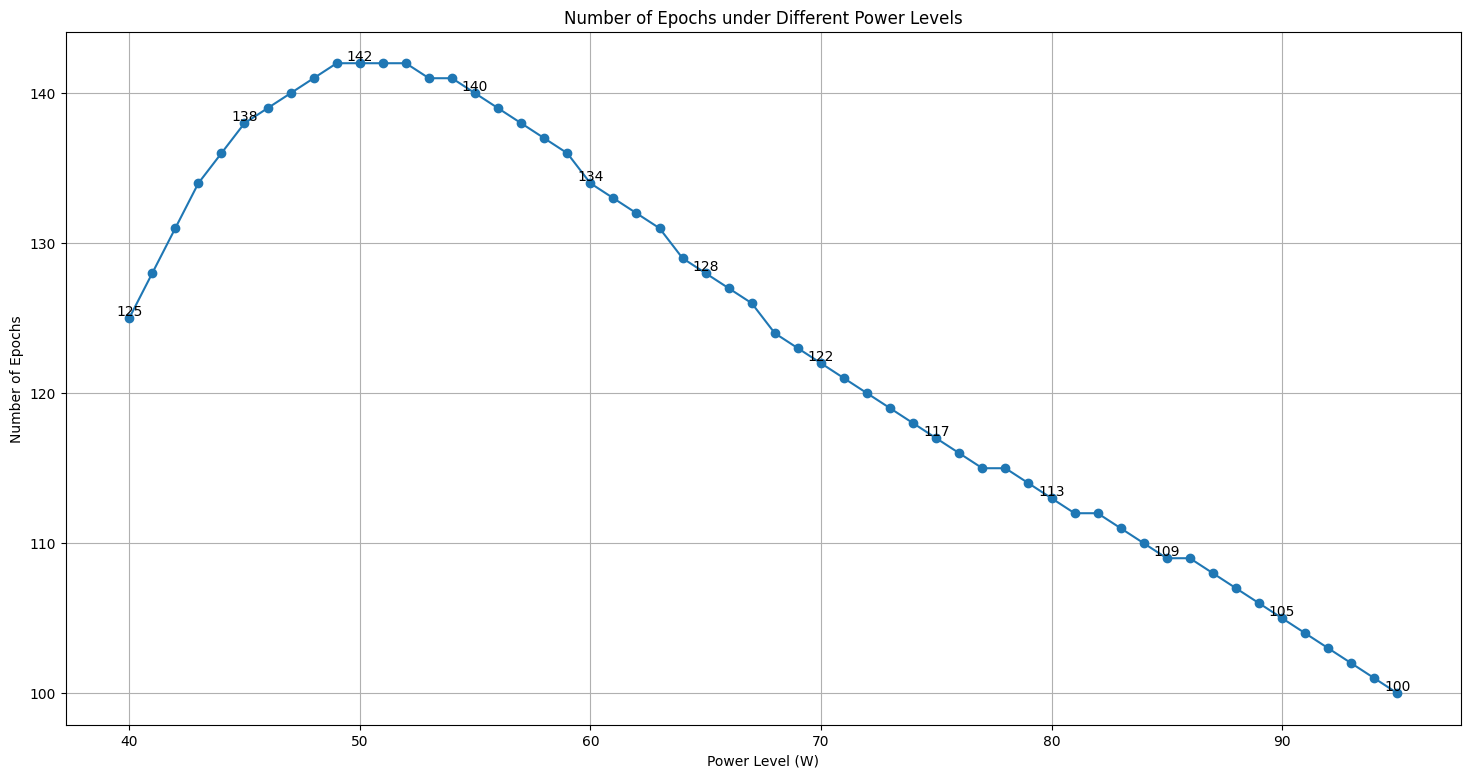

In [23]:
NumEpochs = []
for i in range(40, 96):
    EpochEnergyi = EnergyConsumptionPredictModel.predict([[i]])
    # round the number of epochs to the nearest integer
    numepochi = int(np.round(TotalEnergyNeeded/EpochEnergyi))
    NumEpochs.append(numepochi)

print(NumEpochs)
# plot the number of epochs under different power levels
plt.figure(figsize=(18, 9))
plt.plot(range(40, 96), NumEpochs, marker='o')
plt.xlabel('Power Level (W)')
plt.ylabel('Number of Epochs')
plt.title('Number of Epochs under Different Power Levels')
plt.grid()

# Add the number of the value every 5 elements
for idx, value in enumerate(NumEpochs):
    if idx % 5 == 0:
        plt.text(40 + idx, value, str(value), ha='center', va='bottom')

plt.show()